In [1]:
import pandas as pd
import warnings
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.api as sm
import itertools
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [2]:
vixdata = pd.read_csv("data.csv")

In [3]:
vixdata.columns

Index(['Date', 'Spot price', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8',
       'F1-Spot', 'F2-spot', 'F3-Spot', 'F4-Spot', 'F5-spot', 'F6-Spot',
       'F7-Spot', 'F8-Spot', 'F2-F1', 'F3-F1', 'F4-F1', 'F5-F1', 'F6-F1',
       'F7-F1', 'F8-F1', 'F3-F2', 'F4-F2', 'F5-F2', 'F6-F2', 'F7-F2', 'F8-F2',
       'F4-F3', 'F5-F3', 'F6-F3', 'F7-F3', 'F8-F3', 'F5-F4', 'F6-F4', 'F7-F4',
       'F8-F4', 'F6-F5', 'F7-F5', 'F8-F5', 'F7-F6', 'F8-F6', 'F8-F7', 'VVIX',
       'Gold Spot price', 'JY/USD'],
      dtype='object')

In [4]:
filtered = vixdata[['Date','Spot price']]
filtered

,Date,Spot price
0,19/2/2013,12.31
1,20/2/2013,14.68
2,21/2/2013,15.22
3,22/2/2013,14.17
4,25/2/2013,18.99
...,...,...
1934,23/10/2020,27.55
1935,26/10/2020,32.46
1936,27/10/2020,33.35
1937,28/10/2020,40.28


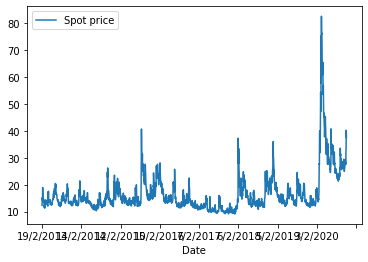

In [5]:
filtered.plot('Date','Spot price')
filtered.set_index('Date')

train_data = filtered[0:1200]
test_data = filtered[1250:1700]

p = q = d = [0,1,2]
d = [0,1]
combs = list(itertools.product(p,d,q))

In [6]:
train_data.set_index('Date')
test_data.set_index('Date')

,Spot price
Date,
6/2/2018,29.98
7/2/2018,27.73
8/2/2018,33.46
9/2/2018,29.06
12/2/2018,25.61
...,...
12/11/2019,12.68
13/11/2019,13.00
14/11/2019,13.05


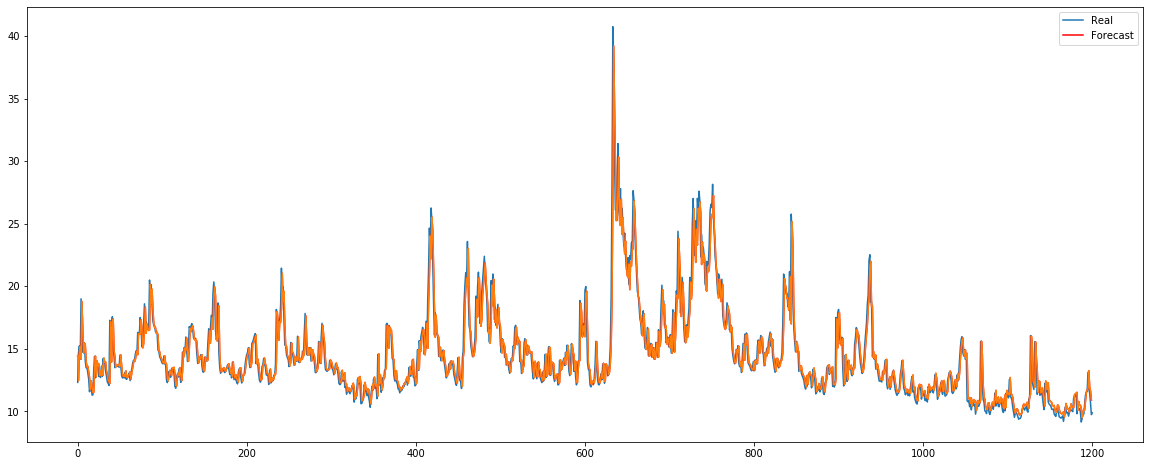

                              ARMA Model Results                              
Dep. Variable:             Spot price   No. Observations:                 1200
Model:                     ARMA(1, 1)   Log Likelihood               -2012.694
Method:                       css-mle   S.D. of innovations              1.294
Date:                Wed, 04 Nov 2020   AIC                           4033.388
Time:                        10:48:35   BIC                           4053.748
Sample:                             0   HQIC                          4041.057
                                                                              
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               14.4441      0.548     26.339      0.000      13.369      15.519
ar.L1.Spot price     0.9313      0.011     82.818      0.000       0.909       0.953
ma.L1.Spot price     0.0195 

In [11]:
from statsmodels.tsa.arima_model import ARMAResults 

fig = plt.figure(figsize=(20,8))
model = ARIMA(train_data['Spot price'], order=(1,0,1)) 
ax = plt.gca()
results = model.fit() 
plt.plot(filtered['Spot price'].loc[0:1200])
plt.plot(results.fittedvalues, color='red')
ax.legend(['Real', 'Forecast'])

forecast = results.predict()
rmse = mean_squared_error(train_data['Spot price'], forecast)**0.5
plt.plot(forecast)
plt.show()

print(results.summary())
print(rmse)
(train_data['Spot price']-forecast).to_csv("error_1_0_1.csv")